# <p style="background-color:green;font-family:newtimeroman;font-size:80%;color:white;text-align:center;border-radius:20px 20px;"><b>Boosting_(Ada_Gradient_XGBoosting_LightGBM_Regressor) </b></p>

# **Ensemble Methods: Purpose and Differences Between Bagging and Boosting**

Ensemble methods aim to create a more robust meta-model by combining a set of weak learners. These methods typically outperform individual models by leveraging the combined learning capacity of multiple models.

 **Purpose of Ensemble Methods**
- **Utilizing Weak Learners**: Weak learners are models that individually have low performance but can make strong predictions when combined.
- **Creating a Meta-Model**: By aggregating predictions from multiple weak learners, ensemble methods provide more accurate and reliable results compared to single models.

---

**Bagging and Boosting**

 **1. Bagging (Bootstrap Aggregating)**
- **Working Principle**:  
  Bagging creates random subsets of the dataset and trains separate models on each subset. Each model is trained on a "bootstrap" sample of the data.
- **Features**:  
  Bagging includes algorithms like Random Forest. Each model is trained independently, and results are aggregated using majority voting or averaging.
- **Goal**:  
  To reduce model variance and mitigate the risk of overfitting.

**2. Boosting**
- **Working Principle**:  
  Boosting trains weak learners sequentially. Each new model focuses on correcting the errors of the previous models.
- **Features**:  
  Boosting includes algorithms like XGBoost and AdaBoost. Models learn from the mistakes of others, and results are combined using weighted voting or averaging.
- **Goal**:  
  To reduce both bias and variance, improving overall model performance.

**Differences Between Bagging and Boosting**

| **Feature**       | **Bagging**                     | **Boosting**                  |
|--------------------|---------------------------------|--------------------------------|
| **Training**       | Parallel, independent training  | Sequential, dependent training |
| **Goal**           | Reducing variance               | Reducing both bias and variance |
| **Model Diversity**| Random subsets                  | Focused on improving errors    |
| **Sampling**       | Random bootstrap sampling       | Weighted data sampling         |
| **Algorithms**     | Random Forest                  | AdaBoost, XGBoost, LightGBM   |

**Application and Evaluation**

Ensemble methods offer different approaches to enhance model performance:  
- **Bagging**: Reduces overfitting by increasing randomness and diversity.  
- **Boosting**: Focuses on collaboration between models to make more precise predictions.

## **About Dataset**

- **Car_Name**: The name or model of the car.
- **Year**: The year of manufacture of the car.
- **Selling_Price**: The selling price of the car.
- **Present_Price**: The current showroom price of the car.
- **Kms_Driven**: The total kilometers driven by the car up to the point of sale.
- **Fuel_Type**: This column would contain categories such as:
  - **Petrol**: Cars that run on petrol fuel.
  - **Diesel**: Cars that use diesel fuel.
  - **CNG**: Cars that are powered by compressed natural gas.

- **Seller_Type**: This column would indicate the type of seller offering the car, which could be:
  - **Dealer**: A business that sells cars as part of its commercial operations.
  - **Individual**: A private individual selling a personal vehicle.

- **Transmission**: This refers to the gearbox system of the car, with common types being:
  - **Manual**: Cars where the driver manually shifts gears.
  - **Automatic**: Cars where the gear shifting process is automated.

- **Owner**: This would typically be a numeric column indicating the number of previous owners of the car, but if it is categorical, it might have entries such as:
  - **First Owner**: Indicates the car is being sold by its original owner.
  - **Second Owner**: Indicates the car has had one previous owner before the current seller.
  - **Third Owner**, and so on.
  
This data set is for estimating the selling price of a car based on its features.

# EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.graph_objs as go

from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split, GridSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor , Pool 

from lazypredict.Supervised import LazyRegressor
import joblib

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
plt.rcParams["figure.figsize"] = (9,5)

In [ ]:
# Load the dataset
df0 = pd.read_csv("car_dataset.csv")
df = df0.copy()

In [ ]:
# Display the first five
# rows of the dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


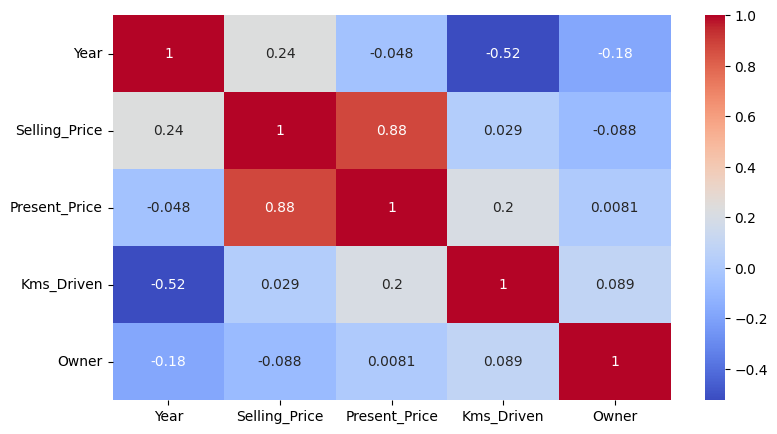

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
corr_matrix = df.select_dtypes(include='number').corr()
heatmap = go.Heatmap(
    z=corr_matrix.values, x=corr_matrix.columns, y=corr_matrix.index,
    colorscale='Magma', zmin=-1, zmax=1, text=corr_matrix.values,
    texttemplate="%{text:.2f}", hoverinfo="none"
)

fig = go.Figure(data=[heatmap], layout=go.Layout(
    title='Corelation Matrix', width=700, height=500))
fig.show()

In [11]:
df["Vehicle_Age"] = 2024 - df.Year

# Converting the production year of the cars in our dataset into an age feature.

In [12]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [13]:
cat_features = df.select_dtypes(include='object').columns
unique_values(df, cat_features)

# Checking how many unique observations exist in the categorical features.
# The number of unique categorical observations in 'car_name' is significantly high compared to the total number of observations in our dataset.

Column: Car_Name
------------------------------
Unique Values (98): ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS 

In [14]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

In [15]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


<Figure size 1200x600 with 0 Axes>

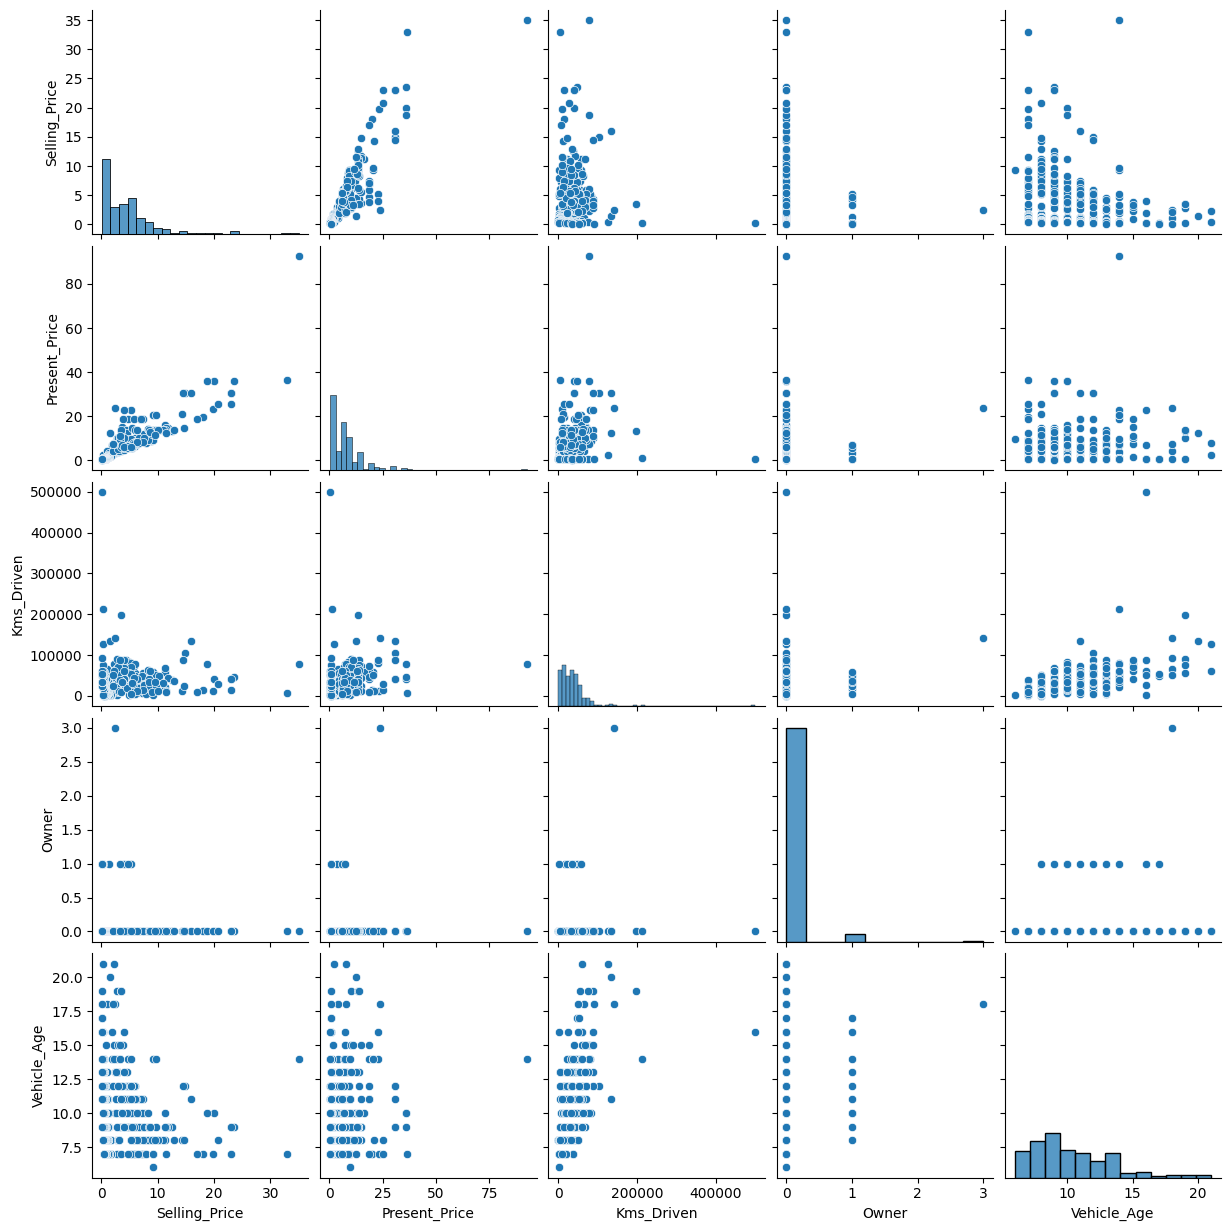

In [ ]:
# pairplot to visualize the relationships between features
plt.figure(figsize=(12, 6))
sns.pairplot(df, palette="Dark2");

In [ ]:
#  Visualizing the distribution of the features in our dataset.
fig = ff.create_distplot([df['Selling_Price']], ['Selling Price'],
                         show_hist=True,
                         show_rug=True)

fig.update_layout(
    title_text='Distribution and Box Plot of Selling Prices',  
    title_font_size=20,  
    xaxis_title_text='Selling Price',  
    yaxis_title_text='Density',  
    template='plotly_white',  
    width=1000,  
    height=500,  
    bargap=0.01, 
)

fig.show()

In [ ]:
box_plot = go.Box(y=df['Selling_Price'], name='Selling Price')

fig = go.Figure(data=[box_plot])
fig.update_layout(title='Selling Price Box Plot')
fig.show()

# Modelling

## Train test split

In [20]:
df2 = df[df.Selling_Price < 10]
df2.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [21]:
X=df2.drop("Selling_Price", axis=1)
y=df2.Selling_Price

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=101)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (218, 7)
Train target shape   :  (218,)
Test features shape  :  (55, 7)
Test target shape    :  (55,)


## AdaBoosting Regressor

**Overview**
AdaBoost is an ensemble technique used to convert weak learners into a strong learner. The AdaBoost Regressor applies this approach to regression problems. Through an iterative process, the model improves performance by assigning higher weights to incorrect predictions and focusing on correcting these errors in subsequent iterations.

**Key Features**
- **Adaptive Learning**: In each iteration, more weight is assigned to data points with incorrect predictions.
- **Flexibility**: Can be used with various base regression models.
- **Resistance to Overfitting**: With proper parameter tuning, it reduces the risk of overfitting.

**Use Cases**
- **Forecasting Models**: Predicting continuous variables such as costs, sales, and demand.
- **Risk Assessment**: Risk prediction in finance and insurance sectors.
- **Time Series Analysis**: Analysis and prediction of time-dependent data.

**Base Estimator**
In regression problems, the default base estimator is a decision tree regressor, while in classification tasks, it is a decision tree classifier. Although sources may mention support vector machines (SVM) or logistic regression as base estimators, decision trees generally achieve the best scores.

In [24]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [25]:
cat_features = X.select_dtypes("object").columns
cat_features 

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [ ]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat_features), remainder='passthrough')

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# operations = [
#     ("OrdinalEncoder", column_trans),
#     ("Ada_model",
#      AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
#                        random_state=101))

operations = [("OrdinalEncoder", column_trans),
              ("Ada_model", AdaBoostRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# The AdaboostRegressor algorithm uses base_estimator=DecisionTreeRegressor(max_depth=3) by default.

# In AdaboostRegressor, the predictions made by each tree are weighted and combined to produce the final prediction.


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('Ada_model', AdaBoostRegressor(random_state=101))])

In [29]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.956000,0.957621
mae,0.425779,0.437001
mse,0.303520,0.346972
rmse,0.550927,0.589043


In [30]:
y_pred_ada = pipe_model.predict(X_test)
y_pred_ada

array([5.77972222, 5.54807692, 6.65247934, 7.22843137, 0.65454545,
       4.32162162, 4.715     , 6.65247934, 0.605     , 4.8297619 ,
       0.632     , 0.605     , 4.55238095, 0.588     , 1.20714286,
       3.48125   , 0.588     , 4.8297619 , 8.07236842, 1.2       ,
       0.605     , 0.632     , 8.22058824, 1.1625    , 1.16      ,
       1.20714286, 0.605     , 5.27323529, 0.605     , 5.77      ,
       0.605     , 5.27323529, 5.40448718, 7.81585366, 8.07236842,
       7.99830508, 1.20714286, 3.96079208, 0.588     , 3.01388889,
       4.6380303 , 1.2       , 5.54807692, 2.84615385, 5.54807692,
       0.605     , 0.65454545, 3.62688312, 2.9       , 4.55238095,
       6.87315385, 0.65454545, 0.605     , 7.18285714, 3.00222222])

In [ ]:
operations = [("OrdinalEncoder", column_trans),
              ("Ada_model", AdaBoostRegressor(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=5,
                        return_train_score=True)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                              0.911126
train_r2                             0.958041
test_neg_mean_absolute_error        -0.537445
train_neg_mean_absolute_error       -0.409848
test_neg_mean_squared_error         -0.598911
train_neg_mean_squared_error        -0.288876
test_neg_root_mean_squared_error    -0.761177
train_neg_root_mean_squared_error   -0.536421
dtype: float64

#### **Working Principles of AdaBoost Regressor and Effects of Parameter Settings**

**Number of Trees in AdaBoost Regressor**
AdaBoost combines predictions from multiple decision trees. Increasing the number of trees often leads to more accurate predictions. However, with small datasets, the performance gain may be limited. For instance, while using 50 trees might yield a score of 5.93, increasing the number of trees could potentially improve the score to 6.5 or higher.

**Weighted Predictions**
AdaBoost generates its final prediction by assigning weights to each tree's output. Typically, the initial few trees hold more weight than subsequent ones. These weights are determined by each tree's performance on the training dataset.

 **Learning Rate**
The learning rate controls the magnitude of adjustments made at each step. Lower learning rates result in smaller adjustments and generally require more trees. For example, reducing the learning rate may necessitate increasing the number of trees to achieve more accurate predictions.

 **Loss Parameter**
The `AdaBoostRegressor` supports three types of loss functions: `"linear"`, `"square"`, and `"exponential"`. Each provides a different method for calculating errors:

- **Linear**: Calculates errors based on the linear difference between predictions and actual values.
- **Square**: Squares the errors, giving more weight to larger errors.
- **Exponential**: The classical error function for AdaBoost, though rarely used for regression tasks.

Selecting the most appropriate loss function for a dataset typically requires cross-validation or other model selection techniques.

**Conclusion**
The effectiveness of AdaBoost depends on the dataset size and parameter tuning. Key parameters such as the number of trees, learning rate, and loss function significantly influence the model's performance. Careful adjustment of these parameters can optimize AdaBoost's predictive accuracy.

### AdaBoost Model Tuning - Gridsearch

In [33]:
param_grid = {"Ada_model__n_estimators":[50,100, 150,200],
              "Ada_model__learning_rate":[0.1, 0.5, 0.8, 1],
              "Ada_model__loss": ["linear", "square"]
            }

# In regression, the estimator is DecisionTreeRegressor(max_depth=3), whereas in classification, the default max_depth is 1.

# Loss function specifies how tree weights are calculated. 
# The default is 'linear'. The best loss function should be identified using GridSearch.

# For splitting criteria of leaves:
# - In classification, Gini index is used.
# - In regression, Mean Squared Error (MSE) is used.

In [34]:
base_estimator=DecisionTreeRegressor(max_depth=2)

operations = [("OrdinalEncoder", column_trans), ("Ada_model", AdaBoostRegressor(estimator=base_estimator, 
                                                                                random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5,
                          n_jobs = -1,
                          return_train_score=True).fit(X_train,y_train)
# Overfitting can also be addressed by adjusting the hyperparameters of the estimator.
# Here, we set max_depth=2 in the base estimator, and now we have no concerns about overfitting.

In [35]:
grid_model.best_params_

{'Ada_model__learning_rate': 1,
 'Ada_model__loss': 'square',
 'Ada_model__n_estimators': 200}

In [36]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('Ada_model',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=2),
                                   learning_rate=1, loss='square',
                                   n_estimators=200, random_state=101))])

In [38]:
y_pred = grid_model.predict(X_test)

ada_R2 = r2_score(y_test, y_pred)
ada_mae = mean_absolute_error(y_test, y_pred)
ada_mse = mean_squared_error(y_test, y_pred)
ada_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.919447,0.942489
mae,0.569287,0.505342
mse,0.555667,0.470857
rmse,0.745431,0.686190


### Feature importance

In [39]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['ordinalencoder__Fuel_Type', 'ordinalencoder__Seller_Type',
       'ordinalencoder__Transmission', 'remainder__Present_Price',
       'remainder__Kms_Driven', 'remainder__Owner',
       'remainder__Vehicle_Age'], dtype=object)

In [40]:
new_features = [i.replace("ordinalencoder__","").replace("remainder__", "") for i in features]
new_features

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'Vehicle_Age']

In [41]:
operations = [("OrdinalEncoder", column_trans),
              ("Ada_model",
               AdaBoostRegressor(estimator=base_estimator,
                                 loss='linear',
                                 n_estimators=50,
                                 learning_rate=1,
                                 random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('Ada_model',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=2),
                                   learning_rate=1, random_state=101))])

In [42]:
pipe_model["Ada_model"].feature_importances_

array([0.08401343, 0.04126417, 0.00995427, 0.56333482, 0.09789195,
       0.        , 0.20354136])

In [43]:
imp_feats = pd.DataFrame(data=pipe_model["Ada_model"].feature_importances_,columns=['Ada_Importance'], index=new_features)
ada_imp_feats = imp_feats.sort_values('Ada_Importance', ascending=False)
ada_imp_feats

,Ada_Importance
Present_Price,0.563335
Vehicle_Age,0.203541
Kms_Driven,0.097892
Fuel_Type,0.084013
Seller_Type,0.041264
Transmission,0.009954
Owner,0.000000


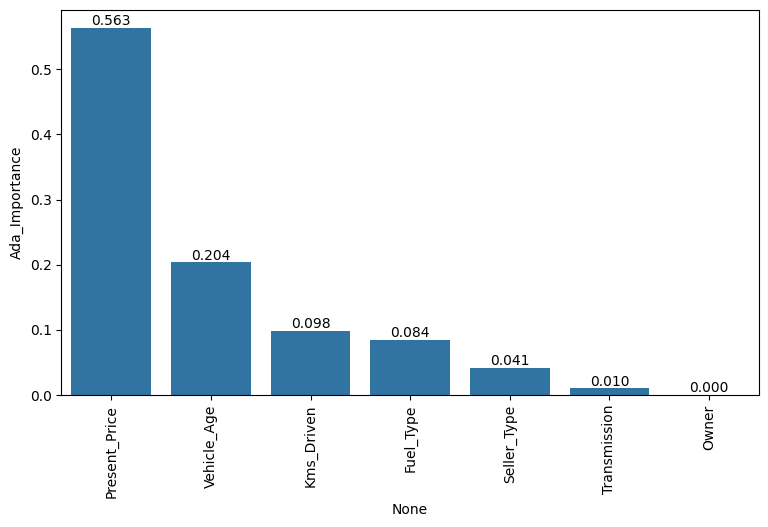

In [44]:
ax = sns.barplot(data=ada_imp_feats, x=ada_imp_feats.index, y='Ada_Importance')
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

## Gradient Boosting Regressor

**Overview**  
Gradient Boosting Regressor is a machine learning technique that sequentially trains weak learners (usually decision trees) to build a strong predictive model. Each new model focuses on correcting the errors of the previous models.

**Key Features**  
- **Sequential Learning**: Each tree attempts to correct the errors of the preceding trees.  
- **Suitable for Complex Datasets**: Effective on diverse and complex data structures.  
- **Flexibility**: Customizable with various loss functions and numerous hyperparameters.  

**Important Parameters**  
- **n_estimators**: The total number of trees. More trees typically improve performance but may lead to overfitting.  
- **learning_rate**: Determines the contribution of each tree. A lower value usually results in slower learning but better performance.  
- **max_depth**: The maximum depth of the trees. Deeper trees increase model complexity.  
- **min_samples_split**: The minimum number of samples required to split a node.  
- **min_samples_leaf**: The minimum number of samples required in a leaf node.  
- **max_features**: The maximum number of features to consider when looking for the best split.  
- **loss**: The loss function to be optimized. For example, `squared_error` is commonly used for regression tasks.  

**Applications**  
- **Price Prediction**: Estimating prices in areas such as real estate and automobiles.  
- **Risk Assessment**: Evaluating risks in financial analysis.  
- **Time Series Forecasting**: Predicting economic trends, weather patterns, and other time-dependent data.

In [ ]:
operations = [("OrdinalEncoder", column_trans), ("GB_model", GradientBoostingRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('GB_model', GradientBoostingRegressor(random_state=101))])

- In regression problems, the average of all observations in the dataset is taken. This average value serves as the initial prediction for all instances.

- The differences (residuals) between these fixed initial predictions and the actual values are calculated, and the model works to minimize these residuals toward zero.

- Similar to classification, the residual value calculated at each tree is multiplied by the learning rate and added to the initial prediction to make new predictions.

In [47]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.991287,0.966749
mae,0.171650,0.364139
mse,0.060105,0.272235
rmse,0.245162,0.521761


In [48]:
operations = [("OrdinalEncoder", column_trans), ("GB_model", GradientBoostingRegressor(random_state=101))]

model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =5,
                       return_train_score=True)

pd.DataFrame(scores).mean()[2:]

test_r2                              0.941771
train_r2                             0.993028
test_neg_mean_absolute_error        -0.425069
train_neg_mean_absolute_error       -0.157127
test_neg_mean_squared_error         -0.389506
train_neg_mean_squared_error        -0.047841
test_neg_root_mean_squared_error    -0.616504
train_neg_root_mean_squared_error   -0.217414
dtype: float64

### GradientBoost Model Tuning - Gridsearch

#### Gradient Boosting Regressor Parameters

**Main Parameters and Their Functions**

- **loss**: Specifies the loss function to be optimized. `'squared_error'` represents the mean squared error and is commonly used for regression.

- **learning_rate**: Reduces the contribution of each tree. A lower value requires more trees but often yields better performance.

- **n_estimators**: Specifies the total number of trees.

- **subsample**: Defines the proportion of training samples used. A value of 1.0 means all training samples are used, while values <1.0 enable Stochastic Gradient Boosting.

- **criterion**: Specifies the quality function. `'friedman_mse'` typically provides the best performance.

- **min_samples_split**: Defines the minimum number of samples required to split a node.

- **min_samples_leaf**: Specifies the minimum number of samples required in a leaf (terminal node).

- **max_depth**: Sets the maximum depth of the trees. Increasing depth increases model complexity.

- **max_features**: Indicates the number or fraction of features to consider when searching for the best split.

- **alpha**: Specifies the quantile value for `'huber'` and `'quantile'` loss functions.

- **verbose**: Controls the amount of information displayed during the process.

- **warm_start**: If set to `True`, fit calls continue from the previous solution.

- **validation_fraction**: Specifies the proportion of training data set aside for early stopping.

- **n_iter_no_change**: Enables early stopping if the validation score does not improve for a specified number of iterations.

- **tol**: Defines the tolerance for early stopping. If the difference between successive iterations is less than this value, the algorithm halts.

- **ccp_alpha**: Specifies the complexity parameter for minimal cost-complexity pruning.

In [49]:
param_grid = {"GB_model__n_estimators":[35,50], 
              "GB_model__subsample":[0.7, 0.8, 1], 
              "GB_model__max_features" : [4,5,6],
              "GB_model__learning_rate": [0.02, 0.03,0.05], 
              'GB_model__max_depth':[1,2],
              'GB_model__min_samples_split':[1,2],
              'GB_model__min_samples_leaf':[1,2]}

# The most important difference from classification is that **loss='squared_error'** is used. 
# In classification, it is **logloss**.

In [50]:
operations = [("OrdinalEncoder", column_trans), ("GB_model", GradientBoostingRegressor(random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5,
                          n_jobs = -1,
                          return_train_score=True).fit(X_train, y_train)

In [51]:
grid_model.best_params_

{'GB_model__learning_rate': 0.05,
 'GB_model__max_depth': 2,
 'GB_model__max_features': 6,
 'GB_model__min_samples_leaf': 1,
 'GB_model__min_samples_split': 2,
 'GB_model__n_estimators': 50,
 'GB_model__subsample': 0.7}

In [52]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('GB_model',
                 GradientBoostingRegressor(learning_rate=0.05, max_depth=2,
                                           max_features=6, n_estimators=50,
                                           random_state=101, subsample=0.7))])

In [53]:
grid_model.best_score_

np.float64(-0.8906369582950624)

In [54]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.910986,0.928724
mae,0.558809,0.600668
mse,0.614037,0.583555
rmse,0.783605,0.763907


In [55]:
operations = [("OrdinalEncoder", column_trans),
              ("GB_model",
               GradientBoostingRegressor(learning_rate=0.05, max_depth=2, max_features=6,
                          n_estimators=50, random_state=101, subsample=0.7))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=5,
                        return_train_score=True)
pd.DataFrame(scores).mean()[2:]

test_r2                              0.881135
train_r2                             0.919685
test_neg_mean_absolute_error        -0.633983
train_neg_mean_absolute_error       -0.530277
test_neg_mean_squared_error         -0.799852
train_neg_mean_squared_error        -0.552804
test_neg_root_mean_squared_error    -0.890637
train_neg_root_mean_squared_error   -0.743172
dtype: float64

In [56]:
y_pred = grid_model.predict(X_test)
grad_R2 = r2_score(y_test, y_pred)
grad_mae = mean_absolute_error(y_test, y_pred)
grad_mse = mean_squared_error(y_test, y_pred)
grad_rmse =np.sqrt(mean_squared_error(y_test, y_pred))
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.910986,0.928724
mae,0.558809,0.600668
mse,0.614037,0.583555
rmse,0.783605,0.763907


### Feature importance

In [57]:
operations = [("OrdinalEncoder", column_trans),
              ("GB_model",
               GradientBoostingRegressor(learning_rate=0.05,
                                         max_depth=2,
                                         max_features=6,
                                         n_estimators=50,
                                         random_state=101,
                                         subsample=0.7))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('GB_model',
                 GradientBoostingRegressor(learning_rate=0.05, max_depth=2,
                                           max_features=6, n_estimators=50,
                                           random_state=101, subsample=0.7))])

In [58]:
pipe_model["GB_model"].feature_importances_

array([0.00417234, 0.26257221, 0.        , 0.59710712, 0.02131662,
       0.        , 0.1148317 ])

In [59]:
imp_feats = pd.DataFrame(data=pipe_model["GB_model"].feature_importances_,columns=['Grad_Importance'], index=new_features)
grad_imp_feats = imp_feats.sort_values('Grad_Importance', ascending=False)
grad_imp_feats

,Grad_Importance
Present_Price,0.597107
Seller_Type,0.262572
Vehicle_Age,0.114832
Kms_Driven,0.021317
Fuel_Type,0.004172
Transmission,0.000000
Owner,0.000000


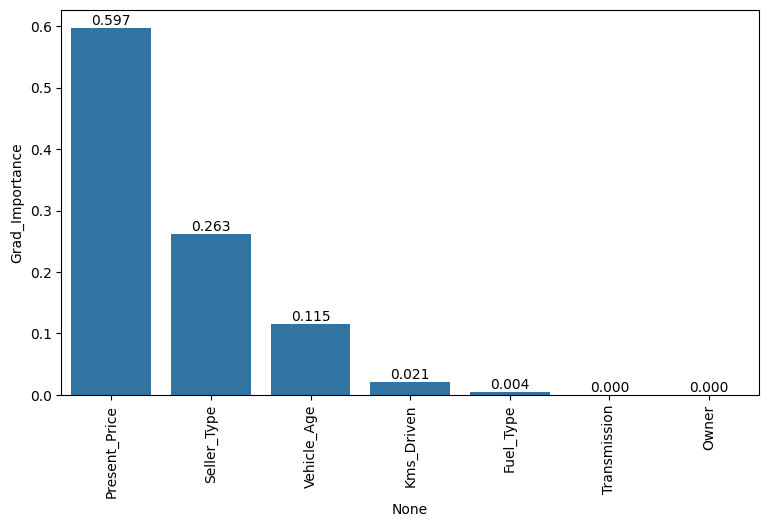

In [60]:
ax = sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='Grad_Importance')
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

#### XGBoost Regressor

**Overview**  
XGBoost stands for eXtreme Gradient Boosting and is an advanced gradient boosting algorithm. It is popular for its high performance and speed, effectively handling large-scale and complex datasets.

**Key Features**  
- **High Performance**: Efficient in both speed and model accuracy.  
- **Scalability**: Works well with large datasets.  
- **Flexibility**: Offers various customization and configuration options.  

**Important Parameters**  
- **n_estimators**: Total number of trees.  
- **learning_rate**: Controls the size of adjustments at each step.  
- **max_depth**: Maximum depth of the trees.  
- **subsample**: Proportion of random samples used for each tree.  
- **colsample_bytree**: Proportion of random features (columns) used for each tree.  
- **objective**: The target function to optimize.  

**Applications**  
- **Price Prediction**: Used in real estate, stock markets, and second-hand goods price estimation.  
- **Demand Forecasting**: Applied in sales, marketing, and supply chain optimization.  
- **Risk Assessment**: Useful in the finance and insurance sectors for risk prediction.

In [62]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_by...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=101, ...))])

In [63]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.999996,0.965353
mae,0.003290,0.350128
mse,0.000025,0.283668
rmse,0.005020,0.532605


In [64]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =5,
                       return_train_score=True)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                              0.936316
train_r2                             0.999999
test_neg_mean_absolute_error        -0.431729
train_neg_mean_absolute_error       -0.001541
test_neg_mean_squared_error         -0.428561
train_neg_mean_squared_error        -0.000005
test_neg_root_mean_squared_error    -0.652341
train_neg_root_mean_squared_error   -0.002275
dtype: float64

### XGBoost Model Tuning - Gridsearch

#### Key Parameters and Functions of XGBoost Regressor

**Core Parameters**

- **n_estimators**: The total number of sequential trees to be created. More trees usually improve performance but can increase the risk of overfitting.

- **learning_rate**: Determines the learning pace and controls each tree's contribution during training. Lower values typically lead to slower learning but better generalization.

- **max_depth**: Maximum depth of each tree. Deeper trees can learn more complex relationships but also risk overfitting.

- **min_child_weight**: Minimum sum of instance weights needed to create a child node. Used to prevent overfitting.

- **gamma**: Minimum loss reduction required to further split a tree node. Helps prevent unnecessary tree expansion and reduces overfitting.

- **subsample**: Proportion of random samples used for each tree. Smaller values can reduce overfitting, but too small can increase bias.

- **colsample_bytree**: Proportion of random features used for each tree. Ensures each tree is built with different subsets of features.

- **reg_alpha**: L1 regularization term (alpha). Reduces model complexity and prevents overfitting.

- **reg_lambda**: L2 regularization term (lambda). Similar to L1 regularization but penalizes large weights differently.

- **scale_pos_weight**: Weighting factor for imbalanced classes. Improves generalization in datasets with class imbalance.

- **objective**: The objective function for optimization. Examples include `reg:squarederror` (mean squared error) and `reg:logistic` (logistic regression).

- **booster**: Specifies the type of model to use. Options include `gbtree` (tree-based models) and `gblinear` (linear models).

---
**Implementation Notes**
- The performance of XGBoost heavily depends on the selected parameters. Proper tuning based on the dataset and problem is crucial.
- To mitigate overfitting risks, parameter adjustments should be made cautiously.

In [65]:
param_grid = {
    "XGB_model__n_estimators": [40, 50, 100],
    "XGB_model__max_depth": [2, 3],
    "XGB_model__learning_rate": [0.01, 0.05, 0.06],
    "XGB_model__subsample": [0.5, 0.8, 1],
    "XGB_model__colsample_bytree": [0.5, 0.8, 1]
}

In [66]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5,
                          n_jobs = -1,
                          return_train_score=True).fit(X_train, y_train)

In [67]:
grid_model.best_params_

{'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.06,
 'XGB_model__max_depth': 3,
 'XGB_model__n_estimators': 100,
 'XGB_model__subsample': 0.5}

In [68]:
grid_model.best_score_

np.float64(-0.6075083528715922)

In [69]:
y_pred = grid_model.predict(X_test)
XGB_R2 = r2_score(y_test, y_pred)
XGB_mae = mean_absolute_error(y_test, y_pred)
XGB_mse = mean_squared_error(y_test, y_pred)
XGB_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.982362,0.974515
mae,0.249822,0.327095
mse,0.121669,0.208656
rmse,0.348811,0.456789


### Feature importance

In [70]:
operations = [("OrdinalEncoder", column_trans),
              ("XGB_model",
               XGBRegressor(n_estimators=100,
                            learning_rate=0.06,
                            max_depth=3,
                            random_state=101,
                            subsample=0.5))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_by...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.06,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=101, ...))])

In [71]:
pipe_model["XGB_model"].feature_importances_

array([0.05342783, 0.17154764, 0.01995244, 0.52592844, 0.04757214,
       0.01224404, 0.16932748], dtype=float32)

In [72]:
pipe_model["OrdinalEncoder"].get_feature_names_out()

array(['ordinalencoder__Fuel_Type', 'ordinalencoder__Seller_Type',
       'ordinalencoder__Transmission', 'remainder__Present_Price',
       'remainder__Kms_Driven', 'remainder__Owner',
       'remainder__Vehicle_Age'], dtype=object)

In [73]:
new_features

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'Vehicle_Age']

In [74]:
imp_feats = pd.DataFrame(data=pipe_model["XGB_model"].feature_importances_, columns=['XGB_Importance'], index=new_features)
xgb_imp_feats = imp_feats.sort_values('XGB_Importance', ascending=False)
xgb_imp_feats

,XGB_Importance
Present_Price,0.525928
Seller_Type,0.171548
Vehicle_Age,0.169327
Fuel_Type,0.053428
Kms_Driven,0.047572
Transmission,0.019952
Owner,0.012244


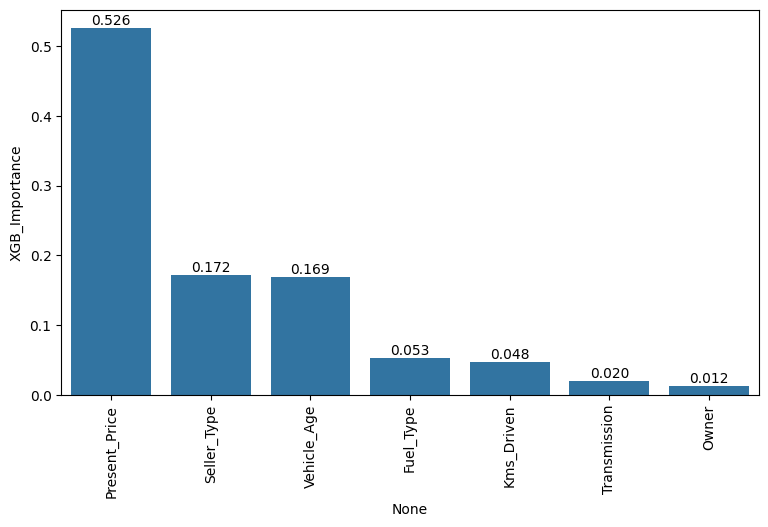

In [75]:
ax = sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index, y='XGB_Importance')
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

In [76]:
pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis=1)

,Ada_Importance,Grad_Importance,XGB_Importance
Present_Price,0.563335,0.597107,0.525928
Vehicle_Age,0.203541,0.114832,0.169327
Kms_Driven,0.097892,0.021317,0.047572
Fuel_Type,0.084013,0.004172,0.053428
Seller_Type,0.041264,0.262572,0.171548
Transmission,0.009954,0.000000,0.019952
Owner,0.000000,0.000000,0.012244


### LightGBM Regressor

**Overview**
LightGBM, developed by Microsoft, is a lightweight and fast gradient boosting framework. It excels in handling large datasets with rapid training times and low memory usage. Additionally, it is known for its ability to process categorical features directly.

**Key Features**
- **Speed and Efficiency**: Fast training and low memory consumption for large datasets.
- **Direct Handling of Categorical Features**: Processes categorical data without requiring extensive feature engineering.
- **Flexibility**: Highly customizable with various loss functions and hyperparameters.

**Important Parameters**

- **num_leaves**: The maximum number of leaves in a tree. Controls the complexity of the model.
  
- **learning_rate**: Determines the learning pace. Lower values usually lead to better generalization performance.
  
- **n_estimators**: Total number of trees to be created. Increasing this value often improves performance.
  
- **max_depth**: Maximum depth of the trees. Deeper trees make the model more complex.
  
- **min_data_in_leaf**: Minimum number of data points in a leaf. Helps prevent overfitting.
  
- **bagging_fraction**: Fraction of data samples used in each iteration. Reduces overfitting and increases model robustness.
  
- **feature_fraction**: Fraction of features used in each iteration. Encourages the model to explore different feature combinations.
  
- **lambda_l1, lambda_l2**: L1 and L2 regularization terms, respectively. Reduce model complexity and prevent overfitting.
  
- **objective**: Specifies the target loss function for optimization. Examples include:
  - `regression`
  - `regression_l1`
  - `huber`
  - `fair`
  
- **boosting_type**: Type of boosting algorithm to use. Options include:
  - `gbdt` (Gradient Boosting Decision Tree, the default)
  - `dart` (Dropouts meet Multiple Additive Regression Trees)

 **Application Notes**
- LightGBM is particularly well-suited for large and high-dimensional datasets, often outperforming XGBoost and other frameworks in terms of speed.
- Proper tuning of parameters can significantly improve the model's performance.

In [77]:
from lightgbm import LGBMRegressor

In [78]:
operations = [("OrdinalEncoder", column_trans), ("LGBM_model", LGBMRegressor(random_state=101, objective='regression'))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 140
[LightGBM] [Info] Number of data points in the train set: 218, number of used features: 6
[LightGBM] [Info] Start training from score 3.390826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('LGBM_model',
                 LGBMRegressor(objective='regression', random_state=101))])

In [79]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.970720,0.971920
mae,0.292468,0.348476
mse,0.201981,0.229899
rmse,0.449423,0.479478


In [80]:
operations = [("OrdinalEncoder", column_trans),
              ("LGBM_model",
               LGBMRegressor(random_state=101, objective='regression'))]

model = Pipeline(steps=operations)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=5,
                        return_train_score=True)

pd.DataFrame(scores).mean()[2:]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 117
[LightGBM] [Info] Number of data points in the train set: 174, number of used features: 5
[LightGBM] [Info] Start training from score 3.302989
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

test_r2                              0.903042
train_r2                             0.957925
test_neg_mean_absolute_error        -0.504097
train_neg_mean_absolute_error       -0.332995
test_neg_mean_squared_error         -0.639389
train_neg_mean_squared_error        -0.289303
test_neg_root_mean_squared_error    -0.781373
train_neg_root_mean_squared_error   -0.535938
dtype: float64

### LightGBM Model Tuning - Gridsearch

* **boosting_type**: Specifies the boosting type used. `'gbdt'` (gradient boosting decision tree) is the default and most commonly used type.

* **num_leaves**: Defines the maximum number of leaves in a tree. Higher values increase model complexity but may lead to overfitting.

* **max_depth**: Specifies the maximum depth of the tree. A value of `-1` means unlimited depth. Increasing depth makes the model more complex.

* **learning_rate**: Determines the learning rate. A lower learning rate results in slower learning and better generalization, but requires more iterations.

* **n_estimators**: Indicates the number of trees used for training. More trees typically improve performance but increase computation time and may lead to overfitting.

* **subsample_for_bin**: Defines the number of samples used to construct histograms. Larger values yield more accurate but slower calculations.

* **objective**: Specifies the objective function for optimization.

* **class_weight**: Determines class weights, often used in imbalanced datasets.

* **min_split_gain**: Minimum gain required to split a node. Higher values help prevent overfitting.

* **min_child_weight**: Minimum weight of a leaf. Higher values make the model more conservative.

* **min_child_samples**: Minimum number of samples required in a leaf.

* **subsample**: Fraction of samples used in each iteration. Helps prevent overfitting.

* **subsample_freq**: Specifies the frequency of subsampling.

* **colsample_bytree**: Fraction of features used in each iteration.

* **reg_alpha**: L1 regularization term.

* **reg_lambda**: L2 regularization term.

* **random_state**: A seed value for randomness.

* **n_jobs**: Number of parallel threads to run.

* **importance_type**: Method to determine feature importance.

In [81]:
param_grid = {
    'LGBM_model__learning_rate': [0.01, 0.05, 0.1],
    'LGBM_model__n_estimators': [100, 200, 500],
    'LGBM_model__max_depth': [3, 5],
    "LGBM_model__num_leaves": [8, 32, 256],  # 2^max_depth'e uygun değerler ikinin maxdepth kuvvetini al demek.
    'LGBM_model__subsample': [0.8, 1.0],
    'LGBM_model__colsample_bytree': [0.8, 0.9, 1.0]
}

**The Importance of `num_leaves` and `max_depth` Parameters in LightGBM**

In LightGBM, the `num_leaves` parameter determines the maximum number of leaves in each tree, directly affecting model complexity. The `max_depth` parameter, on the other hand, specifies the maximum depth of the tree. There needs to be harmony between these two parameters.

**Setting the `num_leaves` Parameter**
- The `num_leaves` parameter is typically set to be less than or equal to \(2^{\text{max_depth}}\), based on the idea that each level of the tree can double the number of splits.
- If `max_depth` is set but `num_leaves` is left unset (or set to an excessively high value), LightGBM may issue warnings about the potential deviation from expected model performance.

**Ensuring Harmony**
- Ideally, the `num_leaves` value should be less than or equal to \(2^{\text{max_depth}}\). However, this is not always practical; overly deep trees can lead to overfitting.
- Therefore, balancing the `num_leaves` parameter is crucial, and finding an optimal value should be part of the hyperparameter optimization process.

**Practical Application**
When tuning your model and optimizing hyperparameters, ensure that these two parameters are in harmony. Balanced settings will enhance the model's generalization capabilities and help guard against overfitting.

In [82]:
operations = [("OrdinalEncoder", column_trans), ("LGBM_model", LGBMRegressor(random_state=101, objective='regression', verbose=-1))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5,
                          n_jobs = -1,
                          return_train_score=True).fit(X_train, y_train)

In [83]:
grid_model.best_params_

{'LGBM_model__colsample_bytree': 0.8,
 'LGBM_model__learning_rate': 0.1,
 'LGBM_model__max_depth': 3,
 'LGBM_model__n_estimators': 200,
 'LGBM_model__num_leaves': 8,
 'LGBM_model__subsample': 0.8}

In [84]:
grid_model.best_score_

np.float64(-0.7686273700076095)

In [85]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.970342,0.973437
mae,0.305457,0.343664
mse,0.204590,0.217481
rmse,0.452316,0.466348


In [86]:
y_pred = grid_model.predict(X_test)
LGBM_R2 = r2_score(y_test, y_pred)
LGBM_mae = mean_absolute_error(y_test, y_pred)
LGBM_mse = mean_squared_error(y_test, y_pred)
LGBM_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.970342,0.973437
mae,0.305457,0.343664
mse,0.204590,0.217481
rmse,0.452316,0.466348


### Feature Importance

In [87]:
operations = [("OrdinalEncoder", column_trans),
              ("LGBM_model",
               LGBMRegressor(random_state=101,
                             objective='regression',
                             colsample_bytree=0.9,
                             learning_rate=0.05,
                             max_depth=3,
                             subsample=0.8,
                             n_estimators=200,
                             verbose=-1))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('LGBM_model',
                 LGBMRegressor(colsample_bytree=0.9, learning_rate=0.05,
                               max_depth=3, n_estimators=200,
                               objective='regression', random_state=101,
                               subsample=0.8, verbose=-1))])

In [88]:
pipe_model["LGBM_model"].feature_importances_

array([ 39,  22,  22, 305, 204,   0, 200], dtype=int32)

In [89]:
imp_feats = pd.DataFrame(data=pipe_model["LGBM_model"].feature_importances_, columns=['LGBM_Importance'], index=new_features)
lgbm_imp_feats = imp_feats.sort_values('LGBM_Importance', ascending=False)
lgbm_imp_feats

,LGBM_Importance
Present_Price,305
Kms_Driven,204
Vehicle_Age,200
Fuel_Type,39
Seller_Type,22
Transmission,22
Owner,0


## CatBoost (Categorical Boosting)

In [90]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [91]:
dfcat = df[df.Selling_Price < 10]
dfcat.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [92]:
X_cat, y_cat = dfcat.drop(["Selling_Price"], axis=1 ), dfcat["Selling_Price"]

In [93]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.2, random_state=101)

In [94]:
X_test_cat.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
33,9.95,45000,Diesel,Dealer,Manual,0,10
13,7.71,26000,Petrol,Dealer,Manual,0,9
208,8.10,3435,Petrol,Dealer,Manual,0,7
296,11.60,33988,Diesel,Dealer,Manual,0,8
154,0.88,8000,Petrol,Individual,Manual,0,10


In [95]:
X_train_cat.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
164,0.54,14000,Petrol,Individual,Manual,0,8
225,4.60,22517,Petrol,Dealer,Manual,0,13
284,5.90,9800,Petrol,Dealer,Manual,0,11
244,9.40,49000,Diesel,Dealer,Manual,0,11
95,18.61,72000,Petrol,Dealer,Manual,0,12


In [96]:
categorical_features = list(X_train_cat.select_dtypes(include="object").columns)
categorical_features

['Fuel_Type', 'Seller_Type', 'Transmission']

In [ ]:
train_pool = Pool(X_train_cat, y_train_cat, cat_features = categorical_features)
test_pool = Pool(X_test_cat, y_test_cat, cat_features = categorical_features)

In [105]:
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")


NumPy version: 2.2.0
Pandas version: 2.2.3


In [102]:
cat_model = CatBoostRegressor(random_state=101)

NameError: name 'CatBoostRegressor' is not defined

In [114]:
cat_model.fit(X_train_cat, y_train_cat, cat_features = categorical_features)

NameError: name 'cat_model' is not defined

In [322]:
# pip install ipywidgets
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager
# jupyter lab build

In [312]:
cat_model.fit(X_train_cat, y_train_cat, cat_features = categorical_features, eval_set=(X_test_cat, y_test_cat), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.04009
0:	learn: 2.5565783	test: 2.7892972	best: 2.7892972 (0)	total: 29.6ms	remaining: 29.6s
1:	learn: 2.4856731	test: 2.7153877	best: 2.7153877 (1)	total: 64.5ms	remaining: 32.2s
2:	learn: 2.4169288	test: 2.6381007	best: 2.6381007 (2)	total: 120ms	remaining: 39.8s
3:	learn: 2.3507520	test: 2.5622081	best: 2.5622081 (3)	total: 152ms	remaining: 37.9s
4:	learn: 2.2828467	test: 2.4829956	best: 2.4829956 (4)	total: 170ms	remaining: 33.8s
5:	learn: 2.2209654	test: 2.4152508	best: 2.4152508 (5)	total: 193ms	remaining: 32s
6:	learn: 2.1645032	test: 2.3532465	best: 2.3532465 (6)	total: 211ms	remaining: 29.9s
7:	learn: 2.1083263	test: 2.2913246	best: 2.2913246 (7)	total: 225ms	remaining: 27.9s
8:	learn: 2.0520732	test: 2.2214006	best: 2.2214006 (8)	total: 251ms	remaining: 27.7s
9:	learn: 1.9951217	test: 2.1524680	best: 2.1524680 (9)	total: 269ms	remaining: 26.7s
10:	learn: 1.9419512	test: 2.0903968	best: 2.0903968 (10)	total: 291ms	remaining: 26.2s
11:	learn: 1.8907307	te

In [326]:
train_val(cat_model, X_train_cat, y_train_cat, X_test_cat, y_test_cat)

,train,test
R2,0.98,0.97
mae,0.29,0.32
mse,0.15,0.22
rmse,0.39,0.47


In [330]:
cat_model = CatBoostRegressor(random_state=101, verbose=0)
scores = cross_validate(cat_model,
                        X_train_cat,
                        y_train_cat,
                        scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=5,
                        return_train_score=True,
                        fit_params={'cat_features': categorical_features})

pd.DataFrame(scores).mean()[2:]

test_r2                              0.92
train_r2                             0.99
test_neg_mean_absolute_error        -0.47
train_neg_mean_absolute_error       -0.13
test_neg_mean_squared_error         -0.52
train_neg_mean_squared_error        -0.04
test_neg_root_mean_squared_error    -0.70
train_neg_root_mean_squared_error   -0.19
dtype: float64

### CatBoost Model Tuning - Gridsearch

In [333]:
param_grid = {
    'learning_rate': [0.01, 0.1],                 
    'iterations': [200, 500],                    
    'depth': [6, 8],                              
    'l2_leaf_reg': [1, 3],                        
    'grow_policy': ['Depthwise', 'Lossguide'],    
    'early_stopping_rounds': [50]                 
}

In [335]:
cat_model = CatBoostRegressor(random_state=101, verbose=0)

In [337]:
cat_grid = GridSearchCV(estimator=cat_model,
                        param_grid=param_grid,
                        cv=3,
                        scoring='neg_root_mean_squared_error',
                        n_jobs=-1,
                        return_train_score=True,
                        ).fit(X_train_cat, y_train_cat, cat_features = categorical_features)

In [339]:
cat_grid.best_params_

{'depth': 8,
 'early_stopping_rounds': 50,
 'grow_policy': 'Lossguide',
 'iterations': 200,
 'l2_leaf_reg': 1,
 'learning_rate': 0.1}

In [343]:
def train_val2(model, X_train, y_train, X_test, y_test, cat_features):
    """
    CatBoost modelinin eğitim ve test kümeleri için regresyon değerlendirme metriklerini hesaplar.

    Args:
        model: Eğitilmiş CatBoost modeli.
        X_train: Eğitim veri kümesi.
        y_train: Eğitim etiketleri.
        X_test: Test veri kümesi.
        y_test: Test etiketleri.
        cat_features: Kategorik özelliklerin isimleri.

    Returns:
        pd.DataFrame: Eğitim ve test kümeleri için metrikler.
    """
    
    # CatBoost için Pool objeleri oluştur
    train_pool = Pool(X_train, y_train, cat_features=cat_features)
    test_pool = Pool(X_test, y_test, cat_features=cat_features)
    
    # Tahminler
    y_train_pred = model.predict(train_pool)
    y_pred = model.predict(test_pool)
    
    # Skorları hesapla
    scores = {
        "train": {
            "R2": r2_score(y_train, y_train_pred),
            "mae": mean_absolute_error(y_train, y_train_pred),
            "mse": mean_squared_error(y_train, y_train_pred),
            "rmse": np.sqrt(mean_squared_error(y_train, y_train_pred))
        },
        "test": {
            "R2": r2_score(y_test, y_pred),
            "mae": mean_absolute_error(y_test, y_pred),
            "mse": mean_squared_error(y_test, y_pred),
            "rmse": np.sqrt(mean_squared_error(y_test, y_pred))
        }
    }
    
    return pd.DataFrame(scores)

In [345]:
y_pred = cat_grid.predict(X_test_cat)
cat_R2 = r2_score(y_test_cat, y_pred)
cat_mae = mean_absolute_error(y_test_cat, y_pred)
cat_mse = mean_squared_error(y_test_cat, y_pred)
cat_rmse = mean_squared_error(y_test_cat, y_pred, squared=False)


train_val(cat_grid.best_estimator_, X_train_cat, y_train_cat, X_test_cat, y_test_cat, cat_features=categorical_features)

,train,test
R2,1.00,0.96
mae,0.08,0.39
mse,0.01,0.33
rmse,0.12,0.57


### Feature Importance

In [384]:
catboost_params = {
    'depth': 8,
    'early_stopping_rounds': 50,
    'grow_policy': 'Lossguide',
    'iterations': 200,
    'l2_leaf_reg': 1,
    'learning_rate': 0.1,
    'verbose': 0
}

model = CatBoostRegressor(**catboost_params)
model.fit(train_pool)
feature_importances = model.get_feature_importance()
imp_feats = pd.DataFrame(data=feature_importances, columns=['CatBoost_Importance'], index=X_train_cat.columns)
cat_imp_feats = imp_feats.sort_values('CatBoost_Importance', ascending=False)
cat_imp_feats

,CatBoost_Importance
Present_Price,46.09
Seller_Type,37.79
Vehicle_Age,10.32
Kms_Driven,3.26
Fuel_Type,1.88
Transmission,0.57
Owner,0.08


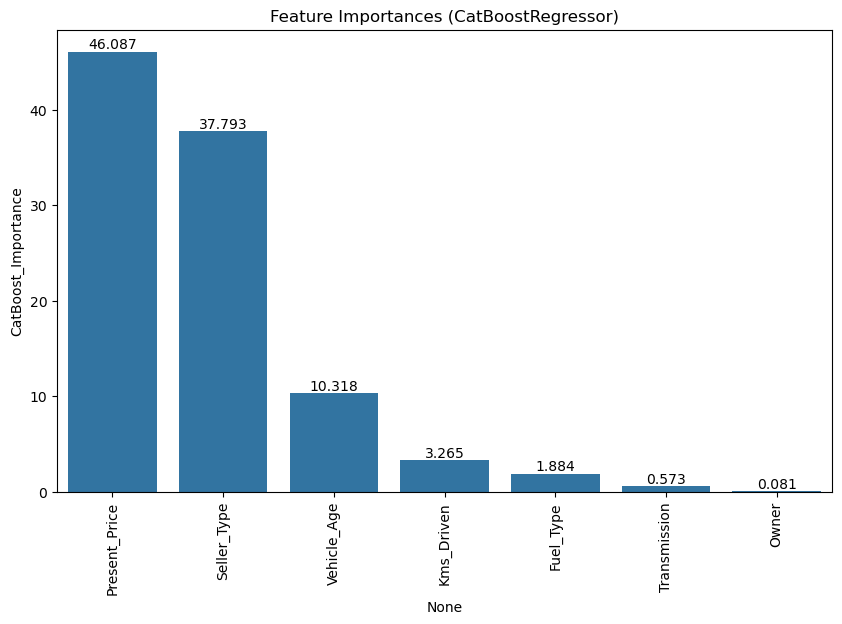

In [386]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=cat_imp_feats, x=cat_imp_feats.index, y='CatBoost_Importance')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90)
plt.title("Feature Importances (CatBoostRegressor)")
plt.show()

In [388]:
pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats, lgbm_imp_feats, cat_imp_feats], axis=1)

,Ada_Importance,Grad_Importance,XGB_Importance,LGBM_Importance,CatBoost_Importance
Present_Price,0.56,0.60,0.53,305,46.09
Vehicle_Age,0.20,0.11,0.17,200,10.32
Kms_Driven,0.10,0.02,0.05,204,3.26
Fuel_Type,0.08,0.00,0.05,39,1.88
Seller_Type,0.04,0.26,0.17,22,37.79
Transmission,0.01,0.00,0.02,22,0.57
Owner,0.00,0.00,0.01,0,0.08


## New model

In [125]:
X2 = df2[["Vehicle_Age",  "Present_Price"]]

In [126]:
X2.head()

,Vehicle_Age,Present_Price
0,10,5.59
1,11,9.54
2,7,9.85
3,13,4.15
4,10,6.87


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.1, random_state=101)

In [128]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")

In [129]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=101, ...)

In [130]:
train_val(model, X_train, y_train, X_test, y_test)

,train,test
R2,0.994030,0.966229
mae,0.084630,0.376038
mse,0.041669,0.294480
rmse,0.204131,0.542660


In [131]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =5)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.921726
test_neg_mean_absolute_error       -0.460411
test_neg_mean_squared_error        -0.521040
test_neg_root_mean_squared_error   -0.709710
dtype: float64

## Gridsearch for new XGBoost model

In [133]:
param_grid = {"n_estimators":[100, 300,500],'max_depth':[3,5,6,7], "learning_rate": [0.05, 0.1, 0.2],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [134]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5,
                          n_jobs = -1)

In [135]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=101, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 6, 7],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.5, 1]},
             scoring='neg_root_mean_squared_error')

In [136]:
grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.5}

In [137]:
grid_model.best_score_

-0.6174496644017105

In [138]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.978207,0.975497
mae,0.276893,0.354309
mse,0.152112,0.213659
rmse,0.390016,0.462232


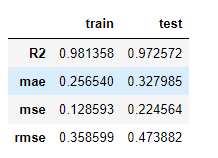

# Model Karşılaştırma

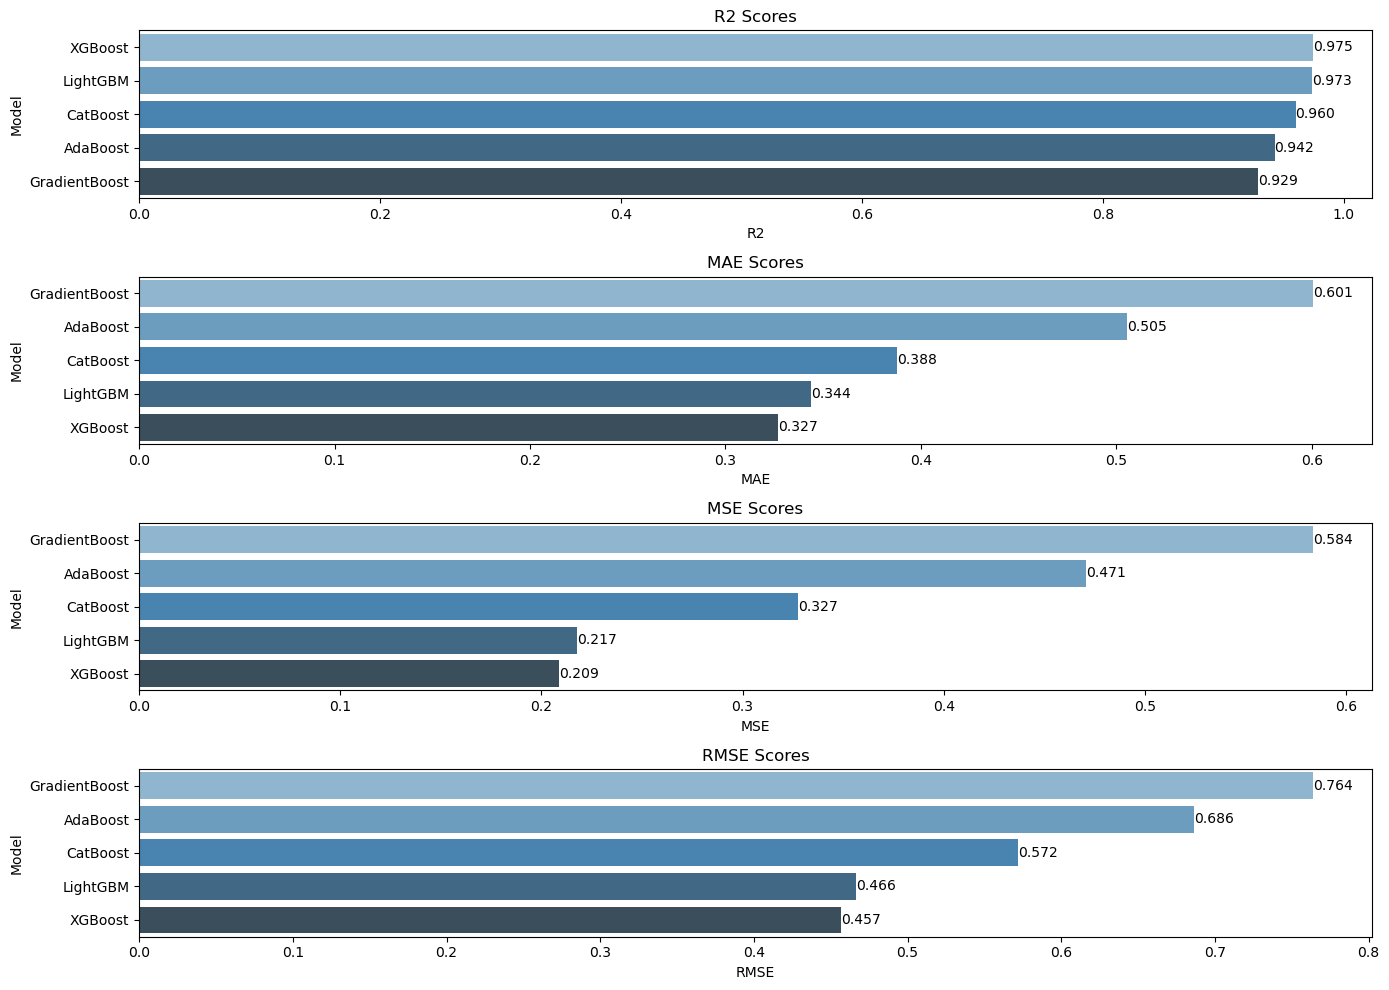

In [347]:
compare = pd.DataFrame({"Model": ["AdaBoost", "GradientBoost", "XGBoost", "LightGBM", "CatBoost"],
                        "R2": [ada_R2, grad_R2, XGB_R2, LGBM_R2, cat_R2],
                        "MAE": [ada_mae, grad_mae, XGB_mae, LGBM_mae, cat_mae],
                        "MSE": [ada_mse, grad_mse, XGB_mse, LGBM_mse, cat_mse],
                        "RMSE": [ada_rmse, grad_rmse, XGB_rmse, LGBM_rmse, cat_rmse]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        
        ax.text(width,                              
                p.get_y() + p.get_height() / 2,     
                '{:.3f}'.format(width),             
                ha='left',                         
                va='center')                       
    
plt.figure(figsize=(14, 10))

plt.subplot(411)
compare = compare.sort_values(by="R2", ascending=False)
ax = sns.barplot(x="R2", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.title('R2 Scores')

plt.subplot(412)
compare = compare.sort_values(by="MAE", ascending=False)
ax = sns.barplot(x="MAE", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.title('MAE Scores')

plt.subplot(413)
compare = compare.sort_values(by="MSE", ascending=False)
ax = sns.barplot(x="MSE", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.title('MSE Scores')

plt.subplot(414)
compare = compare.sort_values(by="RMSE", ascending=False)
ax = sns.barplot(x="RMSE", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.title('RMSE Scores')

plt.tight_layout()
plt.show()

# Final Model & Prediction

In [143]:
cat_features

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [ ]:
 ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat_features),
                                       remainder='passthrough')

operations = [("OrdinalEncoder", column_trans),
              ("XGB_model",
               XGBRegressor(n_estimators=100,
                            learning_rate=0.1,
                            max_depth=3,
                            random_state=101,
                            subsample=0.5))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_by...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, random_state=101, ...))])

In [145]:
pd.DataFrame(column_trans.fit_transform(X)).head()

,0,1,2,3,4,5,6
0,2.0,0.0,1.0,5.59,27000.0,0.0,10.0
1,1.0,0.0,1.0,9.54,43000.0,0.0,11.0
2,2.0,0.0,1.0,9.85,6900.0,0.0,7.0
3,2.0,0.0,1.0,4.15,5200.0,0.0,13.0
4,1.0,0.0,1.0,6.87,42450.0,0.0,10.0


In [ ]:
# Save the model
joblib.dump(pipe_model, "pipe_model_xgb.joblib")
print("Model successfully uploaded.")

Model başarıyla kaydedildi.


In [ ]:
loaded_model = joblib.load("pipe_model_xgb.joblib")
print("Model successfully uploaded.")

Model başarıyla yüklendi.


In [ ]:
samples = {"Present_Price": [9, 7.2],
           "Kms_Driven": [20000, 40000],
           "Fuel_Type":["Petrol", "Diesel"],
           'Seller_Type':['Individual', 'Dealer'],
           'Transmission': ['Automatic', 'Manual'],
           "Owner":[0,2],
           "Vehicle_Age":[2, 7]}

In [356]:
df_samples = pd.DataFrame(samples)
df_samples

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,9.00,20000,Petrol,Individual,Automatic,0,2
1,7.20,40000,Diesel,Dealer,Manual,2,7


In [ ]:
predictions = loaded_model.predict(df_samples)
print("Predictions:", predictions)

Tahminler: [7.9717665 5.1441545]


In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:03<00:00, 12.58it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.98       0.98  0.40        0.14
LGBMRegressor                                0.98       0.98  0.43        0.07
HistGradientBoostingRegressor                0.97       0.98  0.45        0.25
RandomForestRegressor                        0.97       0.97  0.51        0.41
BaggingRegressor                             0.97       0.97  0.52        0.05
XGBRegressor                                 0.96       0.97  0.54        0.09
SVR                                          0.96       0.97  0.54        0.03
NuSVR                                        0.96       0.97  0.55        0.05
DecisionTreeRegressor                        0.96       0.97  0.55        0.02
ExtraTreesRegressor                          0.96       0.96  0.56        0.27
AdaBoostRegressor                            0.95   